## Course: DSC530
## Assignment: 5.2, Modeling Distributions and PDFs
## Name: Laura Hoffmann
## Date: 10/2/2020

### Setup

In [1]:
from __future__ import print_function, division

import scipy.stats
import thinkstats2
import thinkplot
import numpy as np
import hinc
#import hinc2

# 5-1

In [2]:
def intocm(inches):
    cm = inches * 2.54
    return cm

mu = 178 # mean height (for males) in cm
sigma = 7.7 # standard deviation (for males) in cm
dist = scipy.stats.norm(loc=mu, scale=sigma)
low = dist.cdf(intocm(70))
high = dist.cdf(intocm(73))
print(high-low)

0.34274683763147457


#### About 34% of males fall between 5'10" and 6'1" tall. That means that 34% of men could potentially join the Blue Man Group based on the simple requirements of being a man and being between 5'10" and 6'1".

# 5-2

The mean height in Pareto World is 2.43 m
About 77.87 % of people are shorter than the mean.
Out of 7 billion people, about 55603.0 should be taller than 1km.
We can expect the tallest person to be 618349.61 m tall, but that's outrageous.


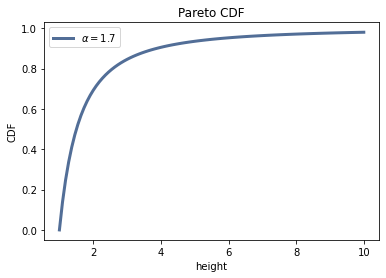

In [3]:
xmin = 1
alpha = 1.7

xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(title='Pareto CDF', xlabel='height', ylabel='CDF')

dist = scipy.stats.pareto(b=alpha, scale=xmin)
print("The mean height in Pareto World is", round(dist.mean(),2), "\bm")
print("About", round(dist.cdf(dist.mean())*100,2), "\b% of people are shorter than the mean.")
print("Out of 7 billion people, about", round((1 - dist.cdf(1000)) * 7e9, 0), "should be taller than 1km.")
print("We can expect the tallest person to be", round(dist.ppf(1 - 1/7e9),2), "\bm tall, but that's outrageous.")

# 6-1

In [4]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

def InterpolateSample(df, log_upper):
    
    df['log_upper'] = np.log10(df.income)

    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    df.loc[41, 'log_upper'] = log_upper
    
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    log_sample = np.concatenate(arrays)
    return log_sample


income_df = hinc.ReadData()

def printing_answers(log_upper):
    log_sample = InterpolateSample(income_df, log_upper)
    sample = np.power(10, log_sample)
    cdf = thinkstats2.Cdf(sample)
    print("The mean of the sample is", round(Mean(sample),2))
    print("The median of the sample is", round(Median(sample),2))
    print("The skewness of the sample is", round(Skewness(sample),2))
    print("The Pearson skewness of the sample is", round(PearsonMedianSkewness(sample),2))
    percent = cdf.Prob(Mean(sample))
    print("About", round(percent*100,2), "\b% of households make a taxable income below the mean.")
    print(" ")
    
print("***When log_upper = 6***")
printing_answers(6.0)

print("***When log_upper = 7***")
printing_answers(7.0)


***When log_upper = 6***
The mean of the sample is 74278.71
The median of the sample is 51226.45
The skewness of the sample is 4.95
The Pearson skewness of the sample is 0.74
About 66.0% of households make a taxable income below the mean.
 
***When log_upper = 7***
The mean of the sample is 124267.4
The median of the sample is 51226.45
The skewness of the sample is 11.6
The Pearson skewness of the sample is 0.39
About 85.66% of households make a taxable income below the mean.
 
